## Лабораторная работа №1 | Вариант 5

Выполнил: Формалёв Александр Сергеевич, М8О-308Б-22

### 1. Numpy

In [195]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [3]:
RGBADType = np.dtype([('R', np.ubyte), ('G', np.ubyte), ('B', np.ubyte), ('A', np.ubyte)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [26]:
vector = np.random.randint(0, 100, 10)
vector.sort()

5. Создайте read-only массив(неизменяемый)

In [38]:
array = np.arange(3)
array.flags.writeable = False

[0 1 2]


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [36]:
cartesian = np.random.randint(0, 100, 20).reshape(10, 2)
x, y = cartesian[:, 0], cartesian[:, 1]
r = np.sqrt(x**2 + y**2)
angle = np.arctan2(y, x)
polar = np.column_stack((r, angle))

[[46 87]
 [54 31]
 [78 66]
 [73 28]
 [46 65]
 [94  8]
 [50 73]
 [68 86]
 [43  8]
 [73  9]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [9]:
coordinate = np.dtype([('X', np.float64), ('Y', np.float64)])
field = np.zeros(100, coordinate)
for i in range(0, 10):
    field['X'][(i * 10):((i + 1) * 10)] = np.linspace(0, 1, 10)
    for j in range(0, 10):
        field['Y'][(i * 10) + j] = field['X'][i]
print(field)

[(0.        , 0.        ) (0.11111111, 0.        )
 (0.22222222, 0.        ) (0.33333333, 0.        )
 (0.44444444, 0.        ) (0.55555556, 0.        )
 (0.66666667, 0.        ) (0.77777778, 0.        )
 (0.88888889, 0.        ) (1.        , 0.        )
 (0.        , 0.11111111) (0.11111111, 0.11111111)
 (0.22222222, 0.11111111) (0.33333333, 0.11111111)
 (0.44444444, 0.11111111) (0.55555556, 0.11111111)
 (0.66666667, 0.11111111) (0.77777778, 0.11111111)
 (0.88888889, 0.11111111) (1.        , 0.11111111)
 (0.        , 0.22222222) (0.11111111, 0.22222222)
 (0.22222222, 0.22222222) (0.33333333, 0.22222222)
 (0.44444444, 0.22222222) (0.55555556, 0.22222222)
 (0.66666667, 0.22222222) (0.77777778, 0.22222222)
 (0.88888889, 0.22222222) (1.        , 0.22222222)
 (0.        , 0.33333333) (0.11111111, 0.33333333)
 (0.22222222, 0.33333333) (0.33333333, 0.33333333)
 (0.44444444, 0.33333333) (0.55555556, 0.33333333)
 (0.66666667, 0.33333333) (0.77777778, 0.33333333)
 (0.88888889, 0.33333333) (1.  

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [26]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
cauchy = np.array([[1.0 / (xi - yj) for yj in y] for xi in x])

[-0.7250402   0.84759119  0.56918221  0.19497053 -0.26237981]
[1.03446558 0.68820684 0.31158787 0.91927028 1.49577188]
[[ -0.56834141  -0.70759038  -0.96466614  -0.60815765  -0.45028574]
 [ -5.3511882    6.27414139   1.86566007 -13.95107043  -1.54277969]
 [ -2.14922789  -8.40162249   3.88207293  -2.85642406  -1.07922636]
 [ -1.19119226  -2.02742579  -8.57505427  -1.38064386  -0.76875689]
 [ -0.77110194  -1.05198195  -1.74225837  -0.84627421  -0.56877913]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [196]:
f = np.empty(10, dtype=np.float32)
i = f.astype(int)

10. Как случайно заменить p элементов в 2D массиве?

In [70]:
def random_replace(a, p):
    np_array = np.asarray(a)
    original_shape = np_array.shape
    np_array = np_array.flatten()
    replaced_el_ind = np.random.choice(np_array.size, size=p, replace=False)
    np_array[replaced_el_ind] = np.random.normal(size=p)
    return np_array.reshape(original_shape)

[[ 1.          0.82007567  3.        ]
 [-0.32868353  5.         -0.47573051]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("./data.csv")

1. Узнайте сколько было на борту человек

In [11]:
df.shape[0]

891

2. Какой медианный и средний возраста пассажиров

In [8]:
average = df["Age"].sum() / df.shape[0]
median = df["Age"].median()
print(average, median)

23.79929292929293 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [10]:
kids_data = df[df["Age"] < 16]
adult_data = df[df["Age"] >= 16]
kids_per = kids_data[kids_data["Survived"] == 1].shape[0] / kids_data.shape[0] * 100
adult_per = adult_data[adult_data["Survived"] == 1].shape[0] / adult_data.shape[0] * 100
print(kids_per, adult_per)

59.036144578313255 38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [101]:
men_data = df[~(df["Age"] < 16) & ~(df["Sex"] == "female")]
other_data = df[(df["Age"] < 16) | (df["Sex"] == "female")]
result = men_data[men_data["Survived"] == 1].shape[0] / men_data.shape[0] * 100 < other_data[other_data["Survived"] == 1].shape[0] / other_data.shape[0] * 100 # True

5. Зависит ли выживаемость от класса обслуживания?

In [103]:
first_df = df[df["Pclass"] == 1]
second_df = df[df["Pclass"] == 2]
third_df = df[df["Pclass"] == 3]
first_per = first_df[first_df["Survived"] == 1].shape[0] / first_df.shape[0] * 100
second_per = second_df[second_df["Survived"] == 1].shape[0] / second_df.shape[0] * 100
third_per = third_df[third_df["Survived"] == 1].shape[0] / third_df.shape[0] * 100
# the bigger class number the lower survival

62.96296296296296 47.28260869565217 24.236252545824847


6. Посчитайте средний возраст умерших женщин и мужчин

In [104]:
dead_women_df = df[(df["Sex"] == "female") & (df["Survived"] == 0)]
dead_men_df = df[(df["Sex"] == "male") & (df["Survived"] == 0)]
dead_men_average = dead_men_df["Age"].sum() / dead_men_df.shape[0]
dead_women_average = dead_women_df["Age"].sum() / dead_women_df.shape[0]

24.321581196581196 19.790123456790123


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [106]:
loner_df = df[(df["SibSp"] == 0) & (df["Parch"] == 0)]
no_loner_df = df[(df["SibSp"] > 0) | (df["Parch"] > 0)]
loner_per = loner_df[loner_df["Survived"] == 1].shape[0] / loner_df.shape[0] * 100
no_loner_per = no_loner_df[no_loner_df["Survived"] == 1].shape[0] / no_loner_df.shape[0] * 100
# difference - 20%

30.353817504655495 50.56497175141242


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [107]:
survivors_df = df[df["Survived"] == 1]
deadmen_df = df[df["Survived"] == 0]
survivors_average_cost = survivors_df["Fare"].sum() / survivors_df.shape[0]
deadmen_average_cost = deadmen_df["Fare"].sum() / deadmen_df.shape[0]
# difference - 26%

48.39540760233918 22.117886885245902


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [110]:
max_age = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]["Age"].max()
min_age = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]["Age"].min()
print(max_age, min_age)

62.0 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [21]:
young_df = df[(df["Age"] >= 18) & (df["Age"] < 35) & (df["Sex"] == "male")]
old_df = df[(df["Age"] >= 35) & (df["Sex"] == "male")]
young_per = young_df[young_df["Survived"] == 1].shape[0] / young_df.shape[0] * 100
old_per = old_df[old_df["Survived"] == 1].shape[0] / old_df.shape[0] * 100
result = young_per > old_per # False

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

### 3. Визуализация

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Постройте гистограмму распределения возростов пассажиров

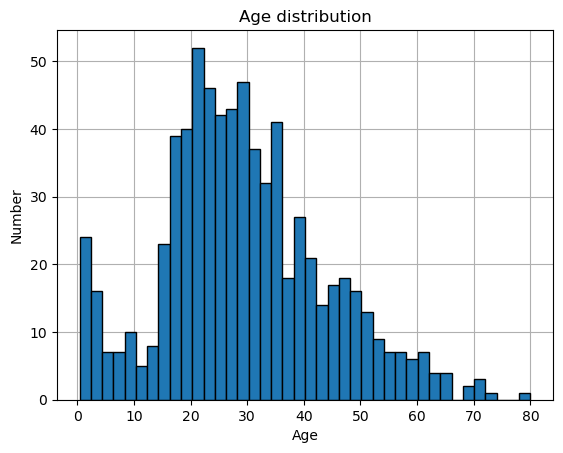

In [89]:
plt.hist(df["Age"], bins=40, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Number")
plt.title("Age distribution")
plt.grid(True)
plt.rc('axes', axisbelow=True)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

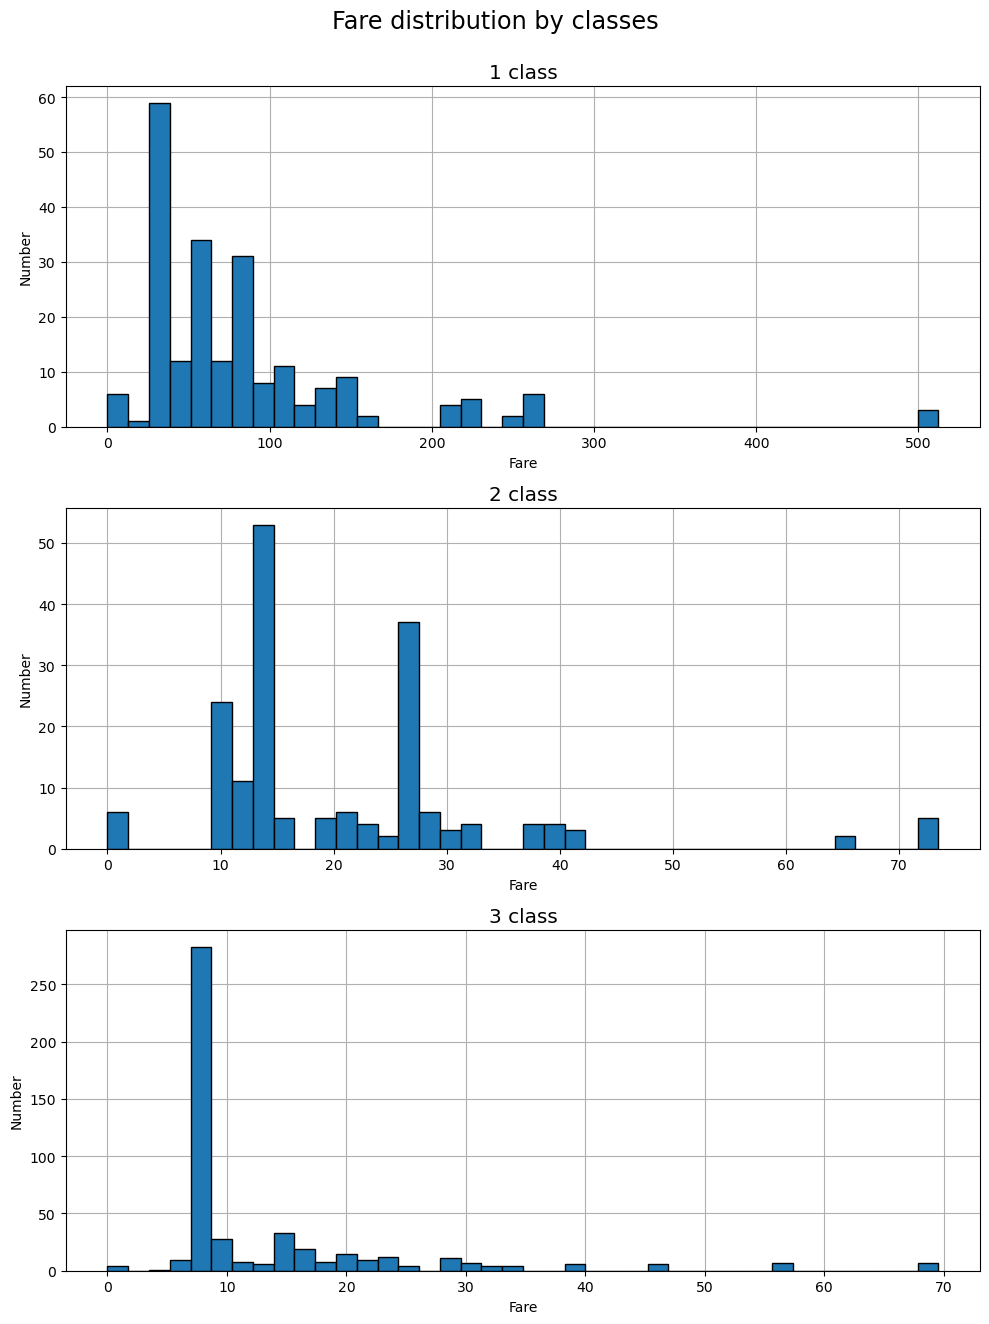

In [86]:
fig1, axs = plt.subplots(3, figsize=(10, 15))
plt.suptitle("Fare distribution by classes", fontsize="xx-large")
for i in range(0, 3):
    axs[i].hist(df[df["Pclass"] == (i + 1)]["Fare"], bins=40, edgecolor="black")
    axs[i].set_title(str(i + 1) + " class", fontsize="x-large")
    axs[i].set_xlabel("Fare")
    axs[i].set_ylabel("Number")
    axs[i].grid(True)
    axs[i].set_axisbelow(True)
plt.tight_layout(rect=[0, 0.1, 1, 0.98])
plt.show()

3. Постройте зависимость цены от возраста пассажира

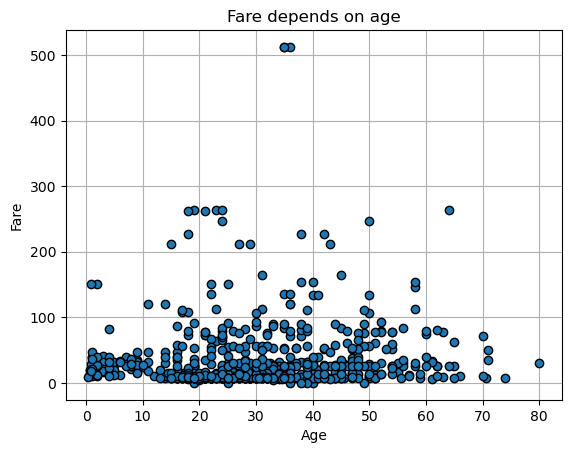

In [100]:
fare_age_df = df.loc[:, ["Fare", "Age"]]
plt.scatter(fare_age_df["Age"], fare_age_df["Fare"], edgecolors="black")
plt.grid(True)
plt.title("Fare depends on age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

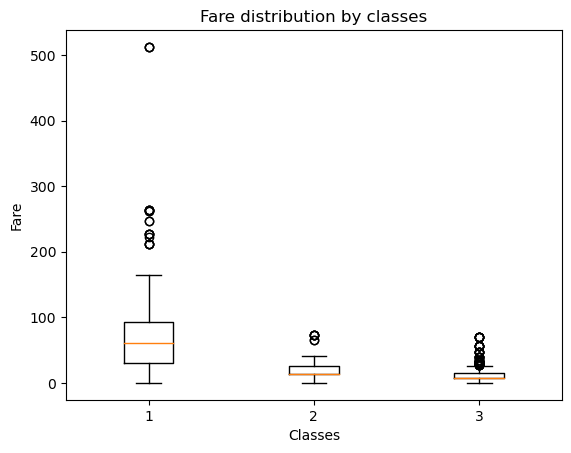

In [108]:
first = df[df["Pclass"] == 1]["Fare"]
second = df[df["Pclass"] == 2]["Fare"]
third = df[df["Pclass"] == 3]["Fare"]
bp = plt.boxplot([first, second, third])
plt.title("Fare distribution by classes")
plt.xlabel("Classes")
plt.ylabel("Fare")
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

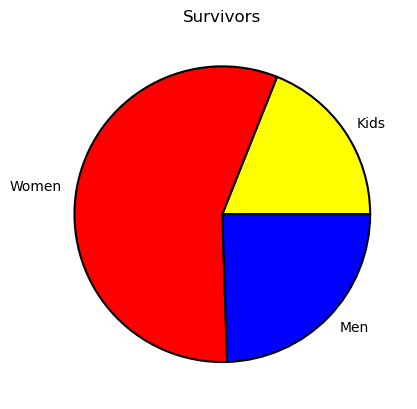

In [174]:
kids = df[(df["Age"] <= 16) & (df["Survived"] == 1)]
women = df[(df["Sex"] == "female") & (df["Age"] > 16) & (df["Survived"] == 1)]
men = df[(df["Sex"] == "male") & (df["Age"] > 16) & (df["Survived"] == 1)]
plt.pie([kids.shape[0], women.shape[0], men.shape[0]], labels= ["Kids", "Women", "Men"], colors=["yellow", "red", "blue"], wedgeprops={'linewidth': 1.5, "edgecolor": "black"})
plt.title("Survivors")
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

Text(0, 0.5, 'Number')

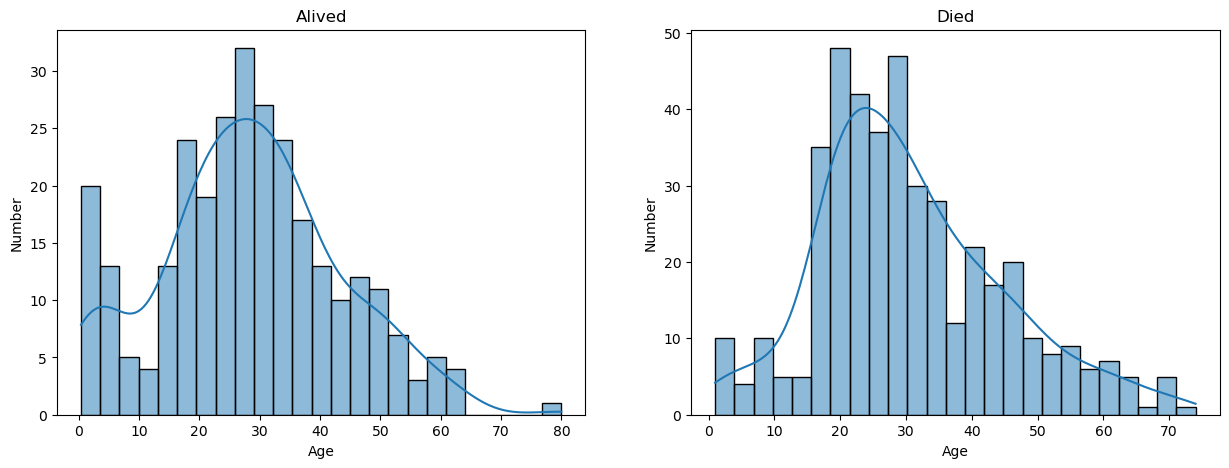

In [138]:
died_age = df[df["Survived"] == 0]["Age"]
alived_age = df[df["Survived"] == 1]["Age"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(alived_age, bins=25, kde=True, edgecolor='black', ax = axes[0])
axes[0].set_title("Alived")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number")
sns.histplot(died_age, bins=25, kde=True, edgecolor='black', ax = axes[1])
axes[1].set_title("Died")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number")
# in different age groups distribution of died and survived people is approximately same

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

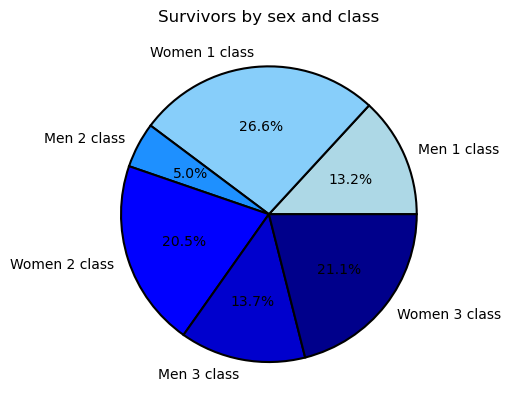

In [193]:
men_survivor = df[(df["Sex"] == "male") & (df["Survived"] == 1)]
women_survivor = df[(df["Sex"] == "female") & (df["Survived"] == 1)]
passengers = []
for i in range(1, 4):
    passengers.append(men_survivor[men_survivor["Pclass"] == i].shape[0])
    passengers.append(women_survivor[women_survivor["Pclass"] == i].shape[0])
plt.pie(
    passengers, 
    labels=["Men 1 class", "Women 1 class", "Men 2 class", "Women 2 class", "Men 3 class", "Women 3 class"],
    colors=["lightblue", "lightskyblue", "dodgerblue", "blue", "mediumblue", "darkblue"],
    autopct="%1.1f%%",
    wedgeprops={'linewidth': 1.5, "edgecolor": "black"}
)
plt.title("Survivors by sex and class")
plt.show()